In [1]:
from google.colab import drive 
drive.mount('/mntDrive') 
%cd "/mntDrive/My Drive"
!pwd

Mounted at /mntDrive
/mntDrive/My Drive
/mntDrive/My Drive


In [2]:
%load_ext autoreload
%autoreload
%load_ext google.colab.data_table

**1. Exploring the dataset**

In [3]:
import pandas as pd

#Load frequency and phasor data sampled at every 1s. Data corresponding to 01.09.2019 to 15.09.2019 (2 weeks) is loaded.
df_freq=pd.read_csv('frequency-1s_2019-09-01_2020-09-30.csv',nrows=1296000,parse_dates = ['time'])
df_phasor=pd.read_csv('phase-angle-1s_2019-09-01_2020-09-30.csv',nrows=1296000,parse_dates = ['time'])



In [4]:
#Show frequency data
df_freq.head(5)

,time,Winterthur,Büdingen,Schondorf,Herzogenrath,Bremen,Dresden,Lleida,Sibiu,Belfort Cedex,Wien (SBA)
0,2019-09-01 00:00:00,NaN,49.9989,49.9989,50.0004,NaN,49.9988,50.0007,49.9974,49.9990,NaN
1,2019-09-01 00:00:01,NaN,49.9963,49.9964,49.9999,NaN,49.9961,49.9988,49.9970,49.9962,NaN
2,2019-09-01 00:00:02,NaN,49.9943,49.9944,49.9988,NaN,49.9943,49.9944,49.9949,49.9945,NaN
3,2019-09-01 00:00:03,NaN,49.9926,49.9925,49.9961,NaN,49.9923,49.9927,49.9918,49.9924,NaN
4,2019-09-01 00:00:04,NaN,49.9895,49.9894,49.9941,NaN,49.9894,49.9929,49.9893,49.9898,NaN


In [5]:
#Show phasor data
df_phasor.head(5)

,time,Winterthur,Büdingen,Schondorf,Herzogenrath,Bremen,Dresden,Lleida,Sibiu,Belfort Cedex,Wien (SBA)
0,2019-09-01 00:00:00,NaN,305.0,152.0,6.0,NaN,194.0,43.0,164.0,177.0,NaN
1,2019-09-01 00:00:01,NaN,303.0,150.0,6.0,NaN,193.0,43.0,163.0,176.0,NaN
2,2019-09-01 00:00:02,NaN,301.0,148.0,5.0,NaN,191.0,41.0,161.0,174.0,NaN
3,2019-09-01 00:00:03,NaN,299.0,145.0,2.0,NaN,188.0,38.0,158.0,171.0,NaN
4,2019-09-01 00:00:04,NaN,295.0,142.0,360.0,NaN,184.0,36.0,155.0,168.0,NaN


In [6]:
#Check for data type, NaN values in the dataset
print('****** Checking for Frequency dataset ******')
df_freq.info()
print('****** Checking for Phasor dataset ******')
df_phasor.info()

****** Checking for Frequency dataset ******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296000 entries, 0 to 1295999
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   time           1296000 non-null  datetime64[ns]
 1   Winterthur     0 non-null        float64       
 2   Büdingen       1295991 non-null  float64       
 3   Schondorf      1295718 non-null  float64       
 4   Herzogenrath   1295782 non-null  float64       
 5   Bremen         0 non-null        float64       
 6   Dresden        1295961 non-null  float64       
 7   Lleida         1295962 non-null  float64       
 8   Sibiu          1288240 non-null  float64       
 9   Belfort Cedex  1295971 non-null  float64       
 10  Wien (SBA)     0 non-null        float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 108.8 MB
****** Checking for Phasor dataset ******
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

**2. Data Visualization**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35143006a0>,
      dtype=object)

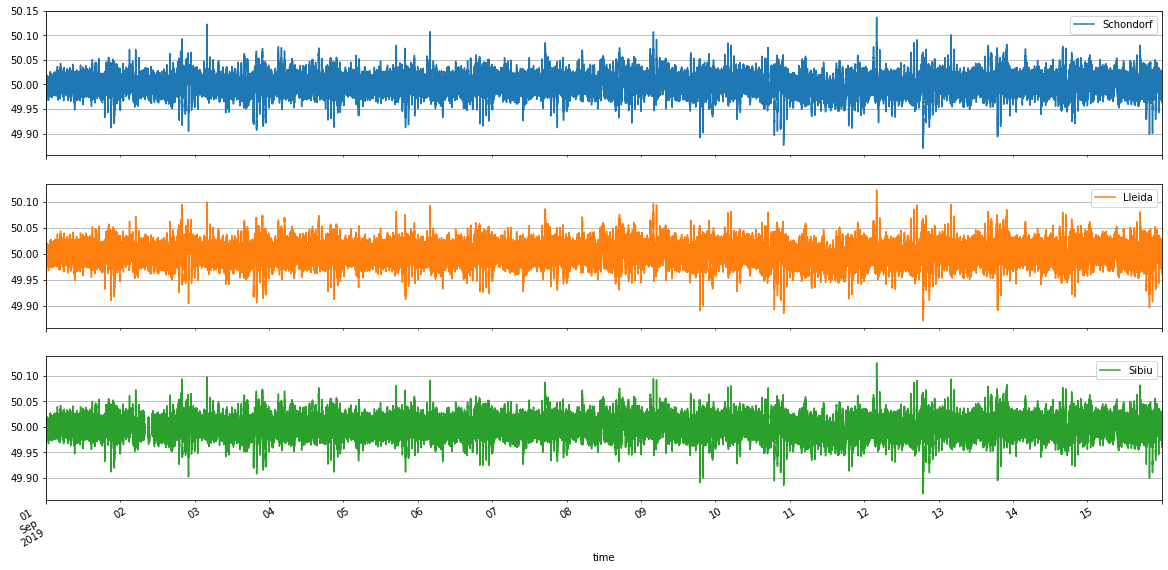

In [7]:
import matplotlib.pyplot as plt

#Going further we would focus on predicting frequencies of Schondorf, Lleida & Sibiu. Schondorf is in south Germany, Lleida is in Spain & Sibiu in Romania.
#Frequency plot generated below for Schondorf and Lleida (before imputing missing values)
df_freq[['time','Schondorf','Lleida','Sibiu']].set_index('time').plot(grid = True, subplots=True, figsize = (20,10))

In [8]:
%%time

#Impute missing values in both frequency and phasor datasets using mean
phase_angle_df_imputed = df_phasor.fillna(df_phasor.mean())
frequency_df_imputed=df_freq.fillna(df_freq.mean())

print('Done Imputing')

df=phase_angle_df_imputed[['time','Schondorf','Lleida','Sibiu']]
df[['Schondorf_freq','Lleida_freq','Sibiu_freq']]=frequency_df_imputed[['Schondorf','Lleida','Sibiu']]
df.rename(columns={'Schondorf': 'Schondorf_phasor', 'Lleida': 'Lleida_phasor','Sibiu': 'Sibiu_phasor'}, inplace=True)
df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.


Done Imputing
CPU times: user 229 ms, sys: 61.2 ms, total: 290 ms
Wall time: 299 ms


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


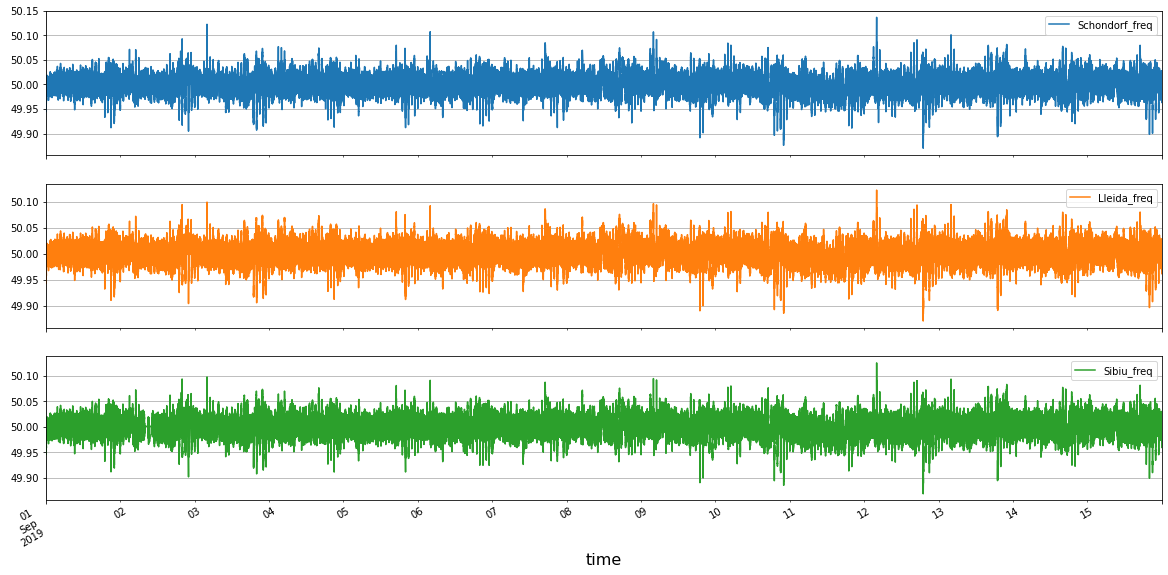

In [9]:
#df.reset_index(inplace=True). Frequency plot for Schondorf, Lleida,Sibiu & Belfort Cedex with time (after imputing missing values)

df[['time','Schondorf_freq','Lleida_freq','Sibiu_freq']].set_index('time').plot(grid = True, subplots=True, figsize = (20,10))
plt.xlabel('time', fontsize=16)
plt.savefig('FrequencyPlot.png')

In [10]:
#Create two different columns for Date and Time which will be used later to generate heatmaps
df = df.assign(Date=df.time.dt.date, Time=df.time.dt.time)
df.set_index('time',inplace=True)

CPU times: user 8.79 s, sys: 411 ms, total: 9.2 s
Wall time: 9.83 s


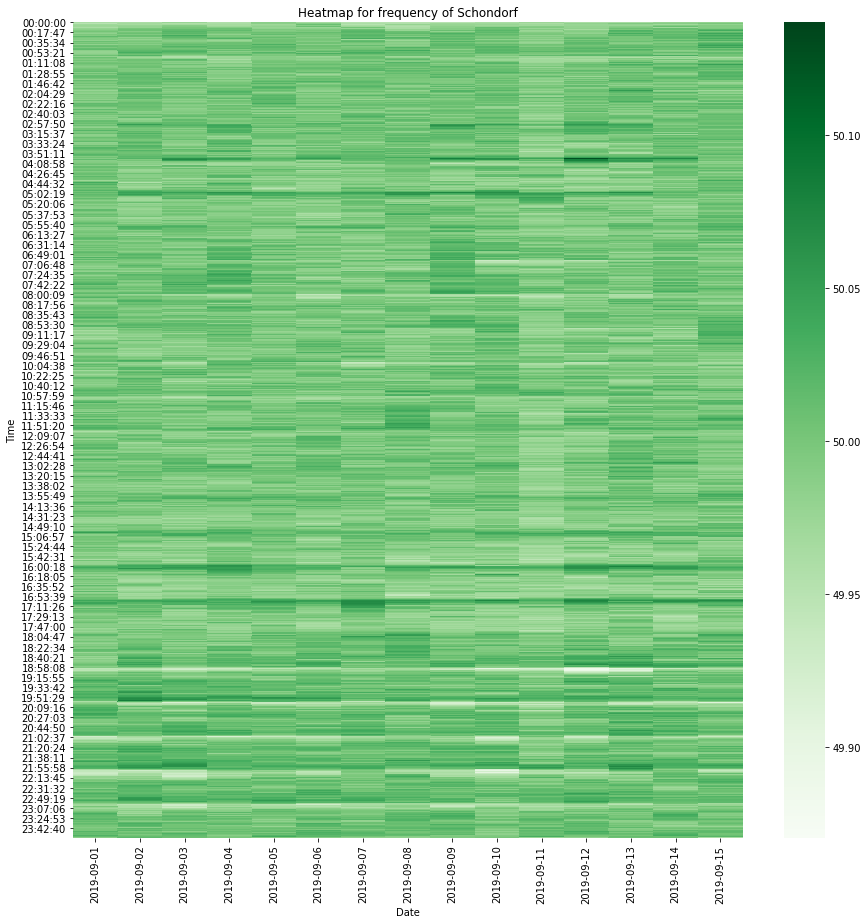

In [11]:
%%time
import seaborn as sns
plt.figure(figsize=(15,15))
heatmap1_data = pd.pivot_table(df, values='Schondorf_freq', index=['Time'], columns='Date')
svm1=sns.heatmap(heatmap1_data, cmap="Greens")
plt.title('Heatmap for frequency of Schondorf')
figure = svm1.get_figure()    
figure.savefig('Schondorf_heatmap.png', dpi=400)

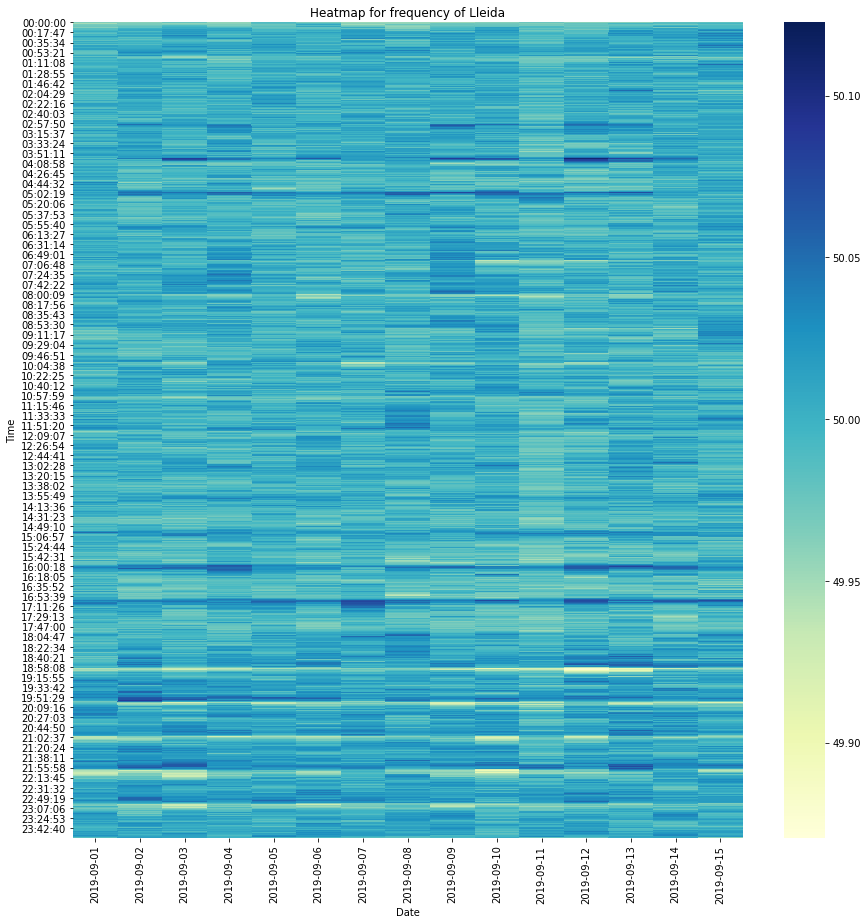

In [12]:
plt.figure(figsize=(15,15))
heatmap2_data = pd.pivot_table(df, values='Lleida_freq', index=['Time'], columns='Date')
svm2=sns.heatmap(heatmap2_data, cmap="YlGnBu")
plt.title('Heatmap for frequency of Lleida')
figure2 = svm2.get_figure()    
figure2.savefig('Lleida.png', dpi=400)

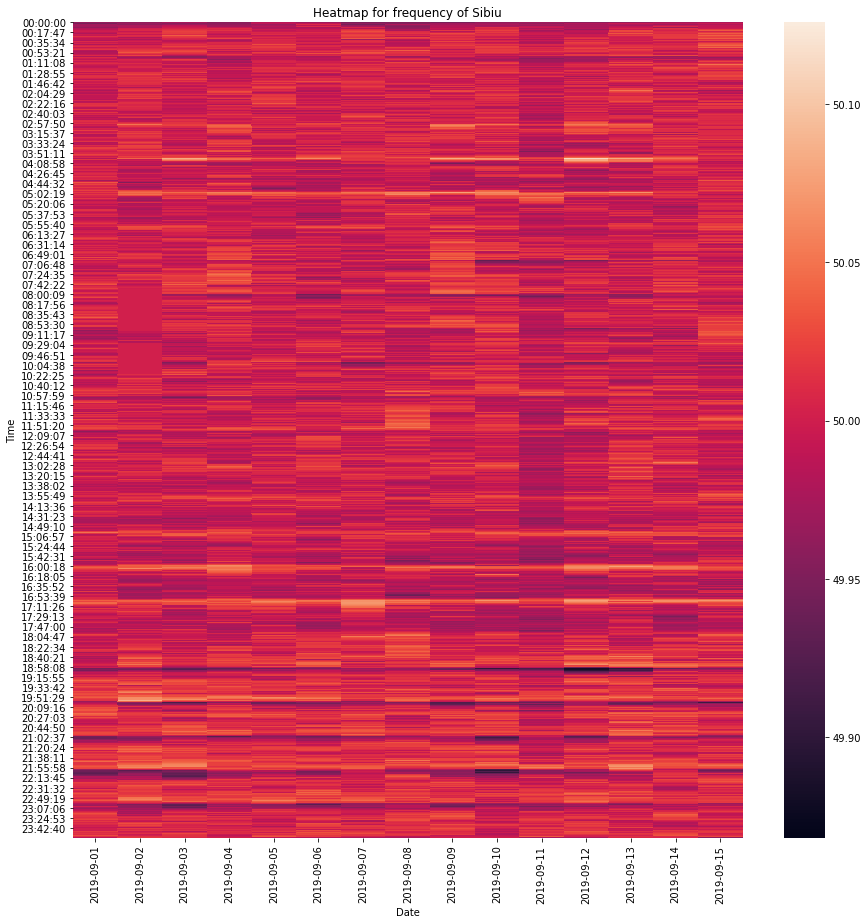

In [13]:
plt.figure(figsize=(15,15))
heatmap4_data = pd.pivot_table(df, values='Sibiu_freq', index=['Time'], columns='Date')
svm4=sns.heatmap(heatmap4_data)
plt.title('Heatmap for frequency of Sibiu')
figure4 = svm4.get_figure()    
figure4.savefig('Sibiu.png')

In [14]:
import numpy as np
#Calculate sine of phase difference between the regions
df['spd_Lleida_Sibiu']=np.sin(np.deg2rad(df['Lleida_phasor'] - df['Sibiu_phasor']))
df['spd_Sibiu_Schondorf']=np.sin(np.deg2rad(df['Sibiu_phasor'] - df['Schondorf_phasor']))
df['spd_Schondorf_Lleida']=np.sin(np.deg2rad(df['Schondorf_phasor'] - df['Lleida_phasor']))

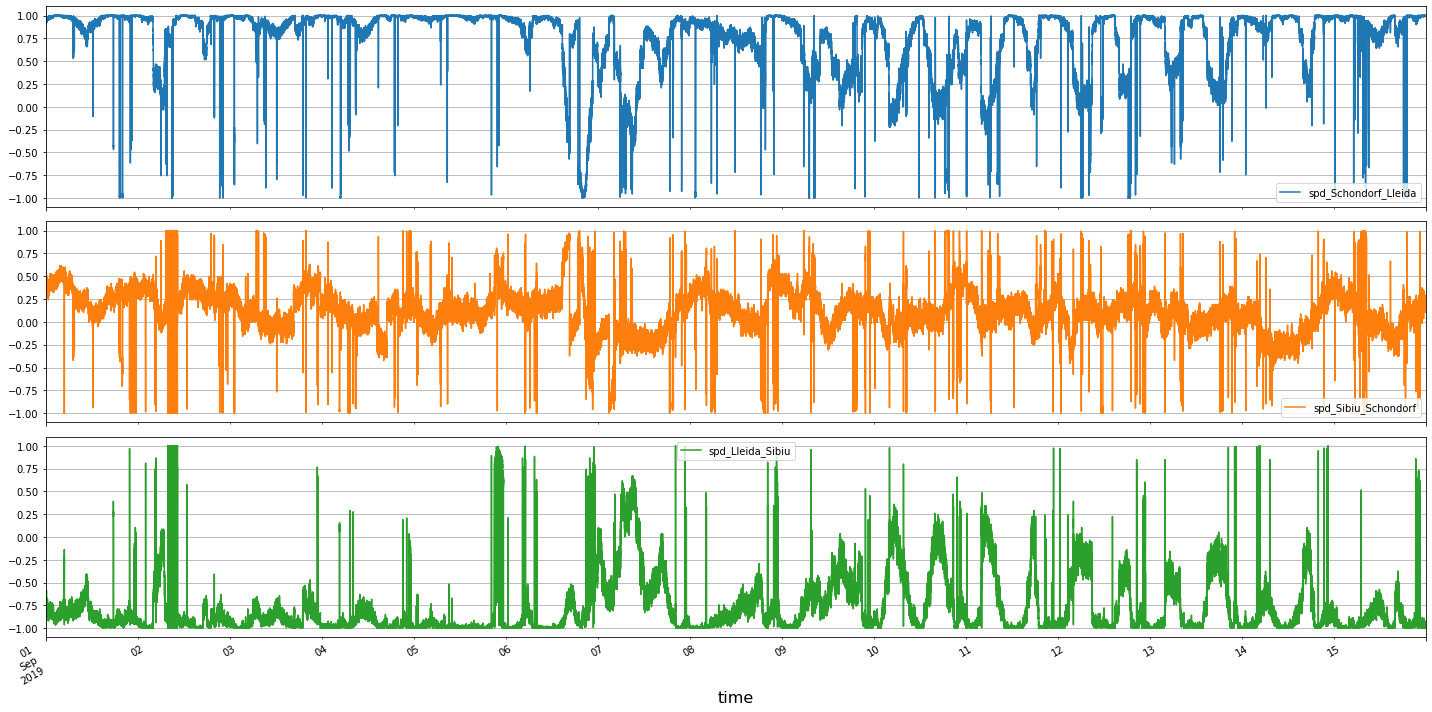

In [15]:
#Plot sine of phase difference between the regions
df[['spd_Schondorf_Lleida','spd_Sibiu_Schondorf','spd_Lleida_Sibiu']].plot(grid = True, subplots=True, figsize = (20,10))
plt.xlabel('time', fontsize=16)
plt.tight_layout()
#plt.title('Sine of phasor difference between pairs of regions')
plt.savefig('Sin_phaseDiff.png')


In [16]:
#plt.figure(figsize=(20,20))
#heatmap3_data = pd.pivot_table(df, values='sin_phasor_diff', index=['Time'], columns='Date')
#svm3=sns.heatmap(heatmap3_data, cmap="YlGnBu")
#plt.title('Heatmap for Sine of phase difference ')
#figure3 = svm3.get_figure()    
#figure3.savefig('PhaseDiff.png', dpi=400)

**3. Analyzing the dataset**

In [17]:
#Check correlation between the frequencies and phase angles of Schondorf and Lleida
print('Correlation between frequencies of Schondorf and Lleida')
df[['Schondorf_freq','Lleida_freq','Sibiu_freq']].corr()


Correlation between frequencies of Schondorf and Lleida


,Schondorf_freq,Lleida_freq,Sibiu_freq
Schondorf_freq,1.000000,0.994537,0.992611
Lleida_freq,0.994537,1.000000,0.987799
Sibiu_freq,0.992611,0.987799,1.000000


In [18]:
print('Correlation between sine of phase angles and frequecies of regions')
df[['Schondorf_freq','Lleida_freq','Sibiu_freq','spd_Schondorf_Lleida','spd_Sibiu_Schondorf','spd_Lleida_Sibiu']].corr()


Correlation between sine of phase angles and frequecies of regions


,Schondorf_freq,Lleida_freq,Sibiu_freq,spd_Schondorf_Lleida,spd_Sibiu_Schondorf,spd_Lleida_Sibiu
Schondorf_freq,1.000000,0.994537,0.992611,0.044321,0.005473,-0.046126
Lleida_freq,0.994537,1.000000,0.987799,0.043578,0.004677,-0.045343
Sibiu_freq,0.992611,0.987799,1.000000,0.045304,0.007680,-0.046277
spd_Schondorf_Lleida,0.044321,0.043578,0.045304,1.000000,0.056478,-0.638603
spd_Sibiu_Schondorf,0.005473,0.004677,0.007680,0.056478,1.000000,-0.245143
spd_Lleida_Sibiu,-0.046126,-0.045343,-0.046277,-0.638603,-0.245143,1.000000


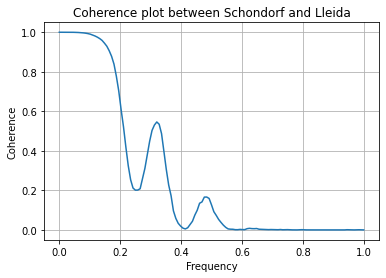

<Figure size 432x288 with 0 Axes>

In [19]:
#Plot coherence between the frequencies of the two chosen places
cohr=plt.cohere(df.Schondorf_freq,df.Lleida_freq) 
plt.title('Coherence plot between Schondorf and Lleida')
plt.show()
plt.savefig('cohr_SL.jpg')

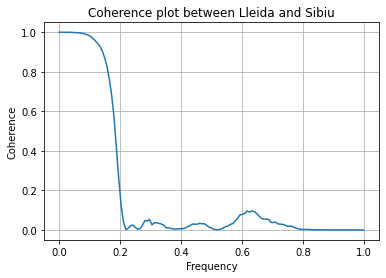

<Figure size 432x288 with 0 Axes>

In [20]:
cohr=plt.cohere(df.Sibiu_freq,df.Lleida_freq) 
plt.title('Coherence plot between Lleida and Sibiu')
plt.show()
plt.savefig('cohr_SiL.png')

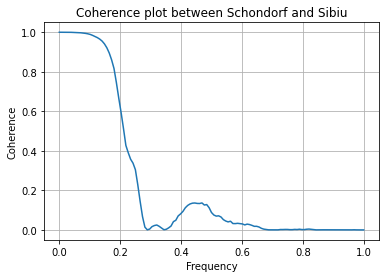

<Figure size 432x288 with 0 Axes>

In [21]:
cohr=plt.cohere(df.Sibiu_freq,df.Schondorf_freq) 
plt.title('Coherence plot between Schondorf and Sibiu')
plt.show()
plt.savefig('cohr_SiS.png')

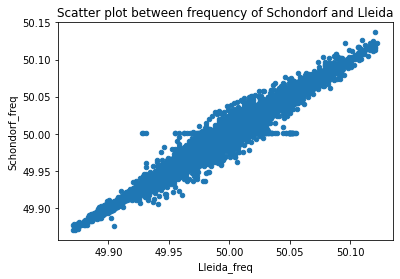

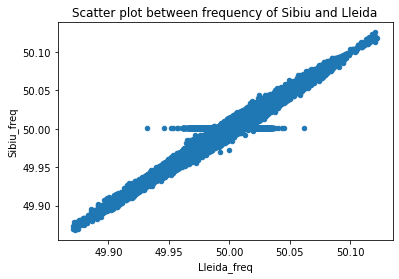

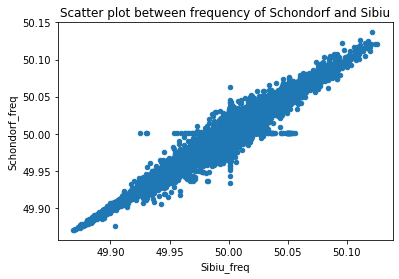

In [22]:
#Scatter-plot between frequencies of two different regions
df.plot.scatter(y='Schondorf_freq',x='Lleida_freq',title="Scatter plot between frequency of Schondorf and Lleida")
df.plot.scatter(y='Sibiu_freq',x='Lleida_freq',title="Scatter plot between frequency of Sibiu and Lleida")
df.plot.scatter(y='Schondorf_freq',x='Sibiu_freq',title="Scatter plot between frequency of Schondorf and Sibiu")

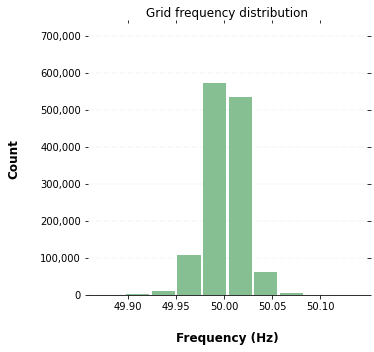

In [23]:
#Plot frequency distribution of Schondorf and Lleida
from scipy.stats import norm
#bins = range(0,100,5),

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax=df.hist(column='Schondorf_freq',grid=False,figsize=(5,5),color='#86bf92', zorder=2, rwidth=0.9)
plt.title('Grid frequency distribution')

ax=ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    
    # Set x-axis label
    x.set_xlabel("Frequency (Hz)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig('TR_Duration.pdf')

In [24]:
# Check for stationarity of data using Augmented Dickey-Füller Test
from statsmodels.tsa.stattools import adfuller

def adf_test(X1):
  result = adfuller(X1,autolag='AIC')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('***** Schondorf frequecy time series *****')
adf_test(np.array(df.Schondorf_freq[1:200000]))
print('***** Lleida frequecy time series *****')
adf_test(np.array(df.Lleida_freq[1:200000]))
print('***** Sibiu frequecy time series *****')
adf_test(np.array(df.Sibiu_freq[1:200000]))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***** Schondorf frequecy time series *****
ADF Statistic: -17.364708
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
***** Lleida frequecy time series *****
ADF Statistic: -17.363443
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
***** Sibiu frequecy time series *****
ADF Statistic: -17.823377
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [25]:
#Check for if one variable is causing the other using Granger's causality test.
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm

print('Checking for causality between frequencies of Schondorf and Lleida')
granger_test=sm.tsa.stattools.grangercausalitytests(df[['Schondorf_freq','Lleida_freq']],maxlag=1,verbose=True)
granger_test

print('Checking for causality between frequency of Schondorf and sine of phase fifference')
granger_test1=sm.tsa.stattools.grangercausalitytests(df[['Schondorf_freq','Sibiu_freq']],maxlag=1,verbose=True)
granger_test1

print('Checking for causality between frequency of Lleida and sine of phase fifference')
granger_test2=sm.tsa.stattools.grangercausalitytests(df[['Sibiu_freq','Lleida_freq']],maxlag=1,verbose=True)
granger_test2

Checking for causality between frequencies of Schondorf and Lleida

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=55786.0820, p=0.0000  , df_denom=1295996, df_num=1
ssr based chi2 test:   chi2=55786.2111, p=0.0000  , df=1
likelihood ratio test: chi2=54618.9333, p=0.0000  , df=1
parameter F test:         F=55786.0820, p=0.0000  , df_denom=1295996, df_num=1
Checking for causality between frequency of Schondorf and sine of phase fifference

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=93809.9046, p=0.0000  , df_denom=1295996, df_num=1
ssr based chi2 test:   chi2=93810.1217, p=0.0000  , df=1
likelihood ratio test: chi2=90570.3573, p=0.0000  , df=1
parameter F test:         F=93809.9046, p=0.0000  , df_denom=1295996, df_num=1
Checking for causality between frequency of Lleida and sine of phase fifference

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=144021.4633, p=0.0000  , df_denom=1295996, df_num=1
ssr base

{1: ({'lrtest': (136566.83975827694, 0.0, 1),
   'params_ftest': (144021.46325638946, 0.0, 1295996.0, 1.0),
   'ssr_chi2test': (144021.79664026183, 0.0, 1),
   'ssr_ftest': (144021.46325621606, 0.0, 1295996.0, 1)},
   array([[0., 1., 0.]])])}

In [26]:
print('Checking for causality between sin of phase difference and frequency')
granger_test2=sm.tsa.stattools.grangercausalitytests(df[['Lleida_freq','spd_Sibiu_Schondorf']],2,verbose=True)
granger_test2

Checking for causality between sin of phase difference and frequency

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=146.8872, p=0.0000  , df_denom=1295996, df_num=1
ssr based chi2 test:   chi2=146.8875, p=0.0000  , df=1
likelihood ratio test: chi2=146.8792, p=0.0000  , df=1
parameter F test:         F=146.8872, p=0.0000  , df_denom=1295996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=85.9288 , p=0.0000  , df_denom=1295993, df_num=2
ssr based chi2 test:   chi2=171.8582, p=0.0000  , df=2
likelihood ratio test: chi2=171.8468, p=0.0000  , df=2
parameter F test:         F=85.9288 , p=0.0000  , df_denom=1295993, df_num=2


{1: ({'lrtest': (146.8791830651462, 8.339547402352292e-34, 1),
   'params_ftest': (146.8871664587724, 8.341212745329674e-34, 1295996.0, 1.0),
   'ssr_chi2test': (146.88750649168085, 8.304680513522524e-34, 1),
   'ssr_ftest': (146.88716647404237, 8.341212681872501e-34, 1295996.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (171.84683273360133, 4.829858479733835e-38, 2),
   'params_ftest': (85.92878174498904, 4.831459799878894e-38, 1295993.0, 2.0),
   'ssr_chi2test': (171.85822651865942, 4.802421521948718e-38, 2),
   'ssr_ftest': (85.92878174217743, 4.83145981337969e-38, 1295993.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

**4. Model Training**

Training the model using original past values

In [27]:
df.reset_index(inplace=True)
#Keep only the variables to be used for prediction
data=df[['time','Schondorf_freq','Lleida_freq','Sibiu_freq','spd_Schondorf_Lleida','spd_Sibiu_Schondorf','spd_Lleida_Sibiu']]
data.set_index('time')

,Schondorf_freq,Lleida_freq,Sibiu_freq,spd_Schondorf_Lleida,spd_Sibiu_Schondorf,spd_Lleida_Sibiu
time,,,,,,
2019-09-01 00:00:00,49.9989,50.0007,49.9974,0.945519,0.207912,-0.857167
2019-09-01 00:00:01,49.9964,49.9988,49.9970,0.956305,0.224951,-0.866025
2019-09-01 00:00:02,49.9944,49.9944,49.9949,0.956305,0.224951,-0.866025
2019-09-01 00:00:03,49.9925,49.9927,49.9918,0.956305,0.224951,-0.866025
2019-09-01 00:00:04,49.9894,49.9929,49.9893,0.961262,0.224951,-0.874620
...,...,...,...,...,...,...
2019-09-15 23:59:55,49.9683,49.9669,49.9710,1.000000,0.207912,-0.978148
2019-09-15 23:59:56,49.9670,49.9650,49.9666,0.999848,0.207912,-0.974370
2019-09-15 23:59:57,49.9655,49.9640,49.9663,0.999391,0.207912,-0.970296


In [57]:
#Split data into training and validation dataset. A 70-30 split is done here.
train=data[:1295980]
valid=data[1295980:]

In [58]:
# Method to choose the best lag order
from statsmodels.tsa.api import VAR
def choose_lag_order(model):
  lags=[10,15,18,25,30]
  AIC=[]
  BIC=[]
  for i in range(len(lags)):
    result=model.fit(maxlags=lags[i])
    AIC.append(result.aic)
    BIC.append(result.bic)
  max_AIC = max(AIC)
  max_AIC_index = AIC.index(max_AIC)
  max_BIC = max(BIC)
  max_BIC_index = BIC.index(max_BIC)
  print('Best AIC is obtained with lag order of:',lags[max_AIC_index],'with AIC value:',max_AIC)
  print('Best BIC is obtained with lag order of:',lags[max_BIC_index],'with BIC value:',max_BIC)
  return lags[max_AIC_index]



#Fitting a Vector Auto-regression model with the three features. The model is trained using upto past 100 values; the lag with best AIC is chosen.
model=VAR(train[['Schondorf_freq','Lleida_freq','Sibiu_freq','spd_Schondorf_Lleida','spd_Sibiu_Schondorf','spd_Lleida_Sibiu']])
p=choose_lag_order(model)
results=model.fit(maxlags=p,ic='aic')
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 31, Jan, 2021
Time:                     16:14:44
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -62.0909
Nobs:                 1.29596e+06    HQIC:                  -62.0946
Log likelihood:       2.92043e+07    FPE:                1.07664e-27
AIC:                     -62.0959    Det(Omega_mle):     1.07619e-27
--------------------------------------------------------------------
Results for equation Schondorf_freq
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.127810         0.002693           47.467           0.000
L1.Schondorf_freq                0.772836         0.000955          809.455           0.000
L1.Llei

In [59]:
#Forecast values equal to the length of validation set
pred=results.forecast(results.y,steps=len(valid))
df_pred=pd.DataFrame(data=pred,index=range(0,len(pred)),columns=['predicted_Schondorf_freq','predicted_Lleida_freq','predicted_Sibiu_freq','spd1','spd2','spd3'])
valid.reset_index(inplace=True)
df_pred=pd.concat([valid,df_pred],axis=1).set_index('time')


/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


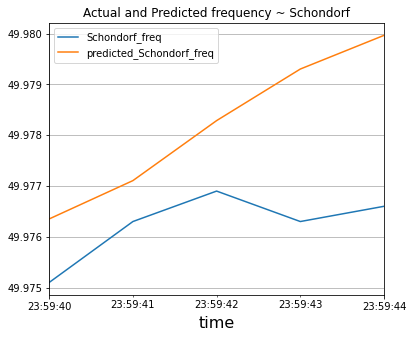

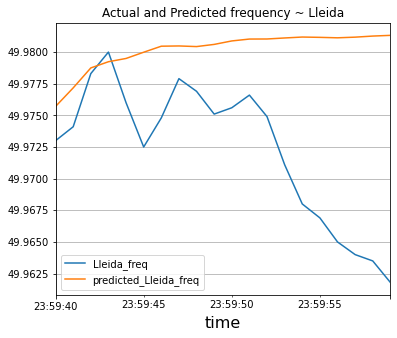

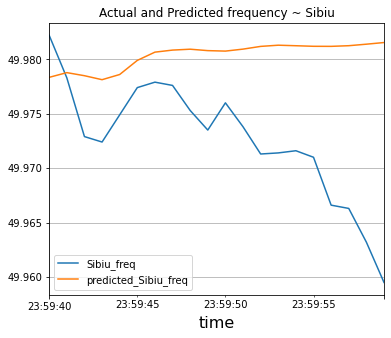

In [62]:
#Plot actual and predicted frequency for Schondorf
df_pred[['Schondorf_freq','predicted_Schondorf_freq']].head().plot(grid = True, figsize = (6,5))
plt.title('Actual and Predicted frequency ~ Schondorf')
plt.xlabel('time', fontsize=16)
plt.savefig('Schondorf_pred.png')

#Plot actual and predicted frequency for Lleida
df_pred[['Lleida_freq','predicted_Lleida_freq']].plot(grid = True, figsize = (6,5))
plt.title('Actual and Predicted frequency ~ Lleida')
plt.xlabel('time', fontsize=16)
plt.savefig('Lleida_pred.png')

#Plot actual and predicted frequency for Schondorf
df_pred[['Sibiu_freq','predicted_Sibiu_freq']].head(2100).plot(grid = True, figsize = (6,5))
plt.title('Actual and Predicted frequency ~ Sibiu')
plt.xlabel('time', fontsize=16)
plt.savefig('Sibiu_pred.png')


In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df_pred['rmse_Schondorf']=mean_squared_error(df_pred['Schondorf_freq'],df_pred['predicted_Schondorf_freq'],squared=False)
df_pred['mse_Schondorf']=mean_squared_error(df_pred['Schondorf_freq'],df_pred['predicted_Schondorf_freq'])
df_pred['mae_Schondorf']=mean_absolute_error(df_pred['Schondorf_freq'],df_pred['predicted_Schondorf_freq'])
print('Root mean squared error ~ Schondorf:',df_pred['rmse_Schondorf'].mean())
print("Mean squared error ~ Schondorf:",df_pred['mse_Schondorf'].mean())
print("MAE ~ Schondorf:",df_pred['mae_Schondorf'].mean())

print('\n')

df_pred['rmse_Lleida']=mean_squared_error(df_pred['Lleida_freq'], df_pred['predicted_Lleida_freq'],squared=False)
df_pred['mse_Lleida']=mean_squared_error(df_pred['Lleida_freq'],df_pred['predicted_Lleida_freq'])
df_pred['mae_Lleida']=mean_absolute_error(df_pred['Lleida_freq'],df_pred['predicted_Lleida_freq'])
print('Root mean squared error ~ Lleida:', df_pred['rmse_Lleida'].mean())
print('Mean squared error ~ Lleida:', df_pred['mse_Lleida'].mean())
print("MAE ~ Lleida:",df_pred['mae_Lleida'].mean())

print('\n')

df_pred['rmse_Sibiu']=mean_squared_error(df_pred['Sibiu_freq'],df_pred['predicted_Sibiu_freq'],squared=False)
df_pred['mse_Sibiu']=mean_squared_error(df_pred['Sibiu_freq'],df_pred['predicted_Sibiu_freq'])
df_pred['mae_Sibiu']=mean_absolute_error(df_pred['Sibiu_freq'],df_pred['predicted_Sibiu_freq'])
print('Root mean squared error ~ Sibiu:', df_pred['rmse_Sibiu'].mean())
print('Mean squared error ~ Sibiu:', df_pred['mse_Sibiu'].mean())
print("MAE ~ Sibiu:",df_pred['mae_Sibiu'].mean())

Root mean squared error ~ Schondorf: 0.009315100205222806
Mean squared error ~ Schondorf: 8.677109183334197e-05
MAE ~ Schondorf: 0.0075612774342229015


Root mean squared error ~ Lleida: 0.00995446428465698
Mean squared error ~ Lleida: 9.909135919451135e-05
MAE ~ Lleida: 0.007957512696895461


Root mean squared error ~ Sibiu: 0.009801190850059236
Mean squared error ~ Sibiu: 9.606334207928499e-05
MAE ~ Sibiu: 0.008103164835372212


Training the model using first difference. Since the results using original values didn't meet expectations, change between values is being used for prediction.

In [53]:
nobs = 20
#data.set_index('time',inplace=True)
df_train, df_test = data[0:-nobs], data[-nobs:]
print(df_train.shape)
print(df_test.shape)

# 1st difference
df_differenced = df_train.diff().dropna()

# 2nd difference
df_differenced = df_differenced.diff().dropna()

# model fitting
model = VAR(df_differenced[['Schondorf_freq','Lleida_freq','Sibiu_freq','spd_Schondorf_Lleida','spd_Sibiu_Schondorf','spd_Lleida_Sibiu']])
results = model.fit(maxlags=5, ic='aic')
results.summary()

(1295980, 6)
(20, 6)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 31, Jan, 2021
Time:                     15:45:46
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -60.1154
Nobs:                 1.29597e+06    HQIC:                  -60.1167
Log likelihood:       2.79218e+07    FPE:                7.78854e-27
AIC:                     -60.1171    Det(Omega_mle):     7.78743e-27
--------------------------------------------------------------------
Results for equation Schondorf_freq
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.000000         0.000001            0.003           0.997
L1.Schondorf_freq              -0.783543         0.000849         -923.128           0.000
L1.Lleida_f

In [54]:
# forecasting
pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=data.index[-nobs:], columns=data.columns + '_1d')
df_forecast.tail()
# inverting transformation
def invert_transformation(df_train, df_forecast, second_diff=True):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# show inverted results in a dataframe
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Schondorf_freq_forecast', 'Lleida_freq_forecast','Sibiu_freq_forecast']]

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


,Schondorf_freq_forecast,Lleida_freq_forecast,Sibiu_freq_forecast
time,,,
2019-09-15 23:59:40,49.976149,49.975507,49.978640
2019-09-15 23:59:41,49.976815,49.976293,49.979686
2019-09-15 23:59:42,49.978053,49.977694,49.979319
2019-09-15 23:59:43,49.978696,49.978403,49.979922
2019-09-15 23:59:44,49.979031,49.978682,49.981557
2019-09-15 23:59:45,49.979288,49.979019,49.983016
2019-09-15 23:59:46,49.979616,49.979490,49.984265
2019-09-15 23:59:47,49.980293,49.979921,49.985136
2019-09-15 23:59:48,49.981179,49.980377,49.985726


In [55]:
df_compare=pd.concat([df_results,df_test],axis=1)
df_compare

,Schondorf_freq_1d,Lleida_freq_1d,Sibiu_freq_1d,spd_Schondorf_Lleida_1d,spd_Sibiu_Schondorf_1d,spd_Lleida_Sibiu_1d,Schondorf_freq_forecast,Lleida_freq_forecast,Sibiu_freq_forecast,spd_Schondorf_Lleida_forecast,spd_Sibiu_Schondorf_forecast,spd_Lleida_Sibiu_forecast,Schondorf_freq,Lleida_freq,Sibiu_freq,spd_Schondorf_Lleida,spd_Sibiu_Schondorf,spd_Lleida_Sibiu
time,,,,,,,,,,,,,,,,,,
2019-09-15 23:59:40,0.000349,-0.000393,0.001240,0.001053,0.009341,-0.004490,49.976149,49.975507,49.978640,1.000901,0.165775,-0.989297,49.9751,49.9730,49.9822,0.999391,0.190809,-0.974370
2019-09-15 23:59:41,0.000666,0.000786,0.001046,-0.000341,0.006784,-0.002586,49.976815,49.976293,49.979686,1.000560,0.172559,-0.991884,49.9763,49.9741,49.9783,0.999391,0.207912,-0.970296
2019-09-15 23:59:42,0.001238,0.001401,-0.000367,0.001413,0.003199,-0.005284,49.978053,49.977694,49.979319,1.001973,0.175758,-0.997167,49.9769,49.9783,49.9729,0.999391,0.190809,-0.974370
2019-09-15 23:59:43,0.000643,0.000710,0.000603,0.000450,-0.009508,-0.000615,49.978696,49.978403,49.979922,1.002423,0.166249,-0.997782,49.9763,49.9800,49.9724,1.000000,0.173648,-0.984808
2019-09-15 23:59:44,0.000335,0.000279,0.001635,0.000697,-0.008022,0.000198,49.979031,49.978682,49.981557,1.003120,0.158227,-0.997585,49.9766,49.9760,49.9749,0.999848,0.156434,-0.984808
2019-09-15 23:59:45,0.000257,0.000337,0.001459,-0.000792,0.001714,-0.000711,49.979288,49.979019,49.983016,1.002328,0.159941,-0.998296,49.9773,49.9725,49.9774,0.999391,0.156434,-0.981627
2019-09-15 23:59:46,0.000328,0.000471,0.001249,-0.000648,0.005428,-0.002358,49.979616,49.979490,49.984265,1.001680,0.165370,-1.000654,49.9760,49.9748,49.9779,0.998630,0.156434,-0.978148
2019-09-15 23:59:47,0.000677,0.000431,0.000871,0.000365,0.004313,-0.003118,49.980293,49.979921,49.985136,1.002045,0.169682,-1.003773,49.9757,49.9779,49.9776,0.998630,0.173648,-0.974370
2019-09-15 23:59:48,0.000886,0.000456,0.000590,0.001590,0.000822,-0.003605,49.981179,49.980377,49.985726,1.003635,0.170504,-1.007377,49.9766,49.9769,49.9753,0.999848,0.190809,-0.978148


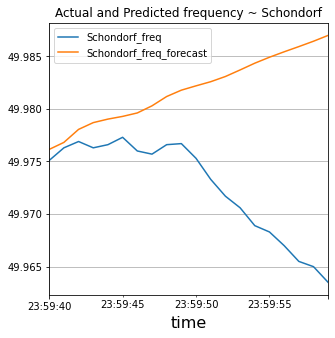

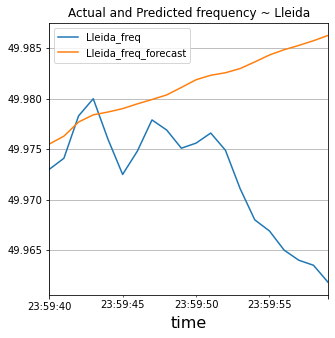

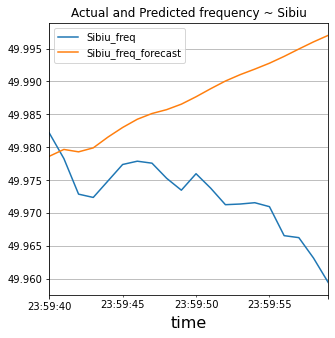

In [63]:
#Plot actual and predicted frequency for Schondorf
df_compare[['Schondorf_freq','Schondorf_freq_forecast']].plot(grid = True, figsize = (5,5))
plt.title('Actual and Predicted frequency ~ Schondorf')
plt.xlabel('time', fontsize=16)
plt.savefig('Schondorf_pred.png')

#Plot actual and predicted frequency for Lleida
df_compare[['Lleida_freq','Lleida_freq_forecast']].plot(grid = True, figsize = (5,5))
plt.title('Actual and Predicted frequency ~ Lleida')
plt.xlabel('time', fontsize=16)
plt.savefig('Lleida_pred.png')

#Plot actual and predicted frequency for Schondorf
df_compare[['Sibiu_freq','Sibiu_freq_forecast']].plot(grid = True, figsize = (5,5))
plt.title('Actual and Predicted frequency ~ Sibiu')
plt.xlabel('time', fontsize=16)
plt.savefig('Sibiu_pred.png')
